<a href="https://colab.research.google.com/github/muneebkh/AI-Project/blob/main/AI_Project_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv('heart.csv')
df.head()
print("Column names:", df.columns)

Column names: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


## **Data Preprocessing**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
#check for missig values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#taking dupliactes values
df_dup=df.duplicated().any()
df_dup

True

In [11]:
df=df.drop_duplicates()
df_dup=df.duplicated().any()
df_dup


False

In [29]:
#data processing
categorical_features = []
numerical_features = []
target_column = 'target'

for col in df.columns:
    if col != target_column:
        if df[col].nunique() <= 10:
            categorical_features.append(col)
        else:
            numerical_features.append(col)

In [43]:
numerical_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [44]:
categorical_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## **Splitting Data**

In [50]:
from sklearn.model_selection import train_test_split
# Splitting data into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [53]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# **RandomForestClassifier**

In [54]:
# Experiment 1: Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2)),  # Generate polynomial features
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest Classifier
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Random Forest Classifier Classification Report:\n", report_rf)

Random Forest Classifier Accuracy: 0.9853658536585366
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# **Decision Tree Classifier**

In [55]:
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2)),  # Generate polynomial features
    ('classifier', DecisionTreeClassifier(random_state=42))  # Decision Tree Classifier
])

pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Classifier Accuracy:", accuracy_dt)
print("Decision Tree Classifier Classification Report:\n", report_dt)

Decision Tree Classifier Accuracy: 0.9853658536585366
Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# **Support Vector Classifier (SVC)**

In [56]:
# Experiment 2: Using Support Vector Classifier (SVC)
from sklearn.svm import SVC

pipeline_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2)),  # Generate polynomial features
    ('classifier', SVC())  # Support Vector Classifier
])

pipeline_svc.fit(X_train, y_train)
y_pred_svc = pipeline_svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)

print("Support Vector Classifier Accuracy:", accuracy_svc)
print("Support Vector Classifier Classification Report:\n", report_svc)

Support Vector Classifier Accuracy: 0.8975609756097561
Support Vector Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       102
           1       0.85      0.96      0.90       103

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



# **k-Nearest Neighbors (KNN)**

In [57]:
# Experiment 3: Using k-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2)),  # Generate polynomial features
    ('classifier', KNeighborsClassifier())  # k-Nearest Neighbors Classifier
])

pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("k-Nearest Neighbors Classifier Accuracy:", accuracy_knn)
print("k-Nearest Neighbors Classifier Classification Report:\n", report_knn)

k-Nearest Neighbors Classifier Accuracy: 0.8390243902439024
k-Nearest Neighbors Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       102
           1       0.81      0.89      0.85       103

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



# **Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2)),  # Generate polynomial features
    ('classifier', LogisticRegression())  # Logistic Regression model
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:\n", report_lr)

Logistic Regression Accuracy: 0.9512195121951219
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       102
           1       0.93      0.97      0.95       103

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
Final_Result=pd.DataFrame(
    {
        'Models':['LR','SVC','KNN','DT','RF',],
        'Accuracy':[accuracy_score(y_test, y_pred_lr),
               accuracy_score(y_test, y_pred_svc),
               accuracy_score(y_test, y_pred_knn),
               accuracy_score(y_test, y_pred_dt),
               accuracy_score(y_test, y_pred_rf),

        ]
    }
)

In [60]:
Final_Result

,Models,Accuracy
0,LR,0.951220
1,SVC,0.897561
2,KNN,0.839024
3,DT,0.985366
4,RF,0.985366


# **Graphical Representation**

In [61]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='Accuracy'>

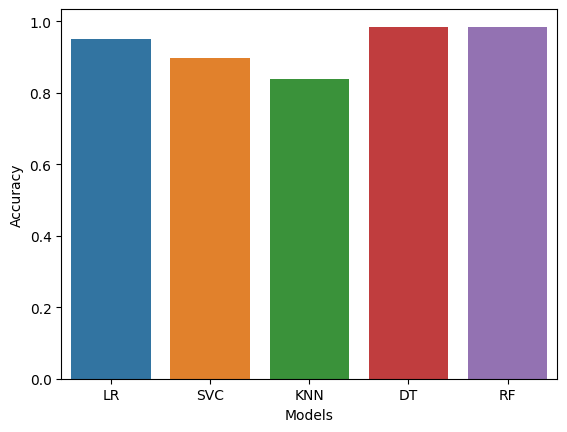

In [62]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
sns.barplot(x='Models', y='Accuracy',hue='Models', data=Final_Result, palette=colors, legend=False)